In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 



In [14]:
ls

Customers.ipynb              Untitled1.ipynb
IMA API 2.ipynb              Untitled2.ipynb
IMA API.ipynb                customer.ipynb
IMA1.ipynb                   data_county.csv
IMA2.ipynb                   data_state.csv
IMA3.ipynb                   location_county.csv
IMA_MLDB1.ipynb              location_state.csv
Products_process.ipynb 2     olist_customers_dataset.csv
Untitled.ipynb               order_pd.csv


In [24]:
pd_reader =pd.read_csv(open("olist_customers_dataset.csv"))

In [25]:
customer_dataset= pd_reader

In [5]:
customer_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
customer_dataset.keys()
## access the keys in products_dataset

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [8]:
## access to the basic information of products_dataset
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
## check null value existence 
customer_dataset.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

 a great number of missing value, therefore we need to iterate and remove some of them

In [10]:
customer_dataset.dropna(axis=0,how='any',inplace=True)

In [11]:
customer_dataset.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

now that we remove the collum who have missing value 

In [12]:
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.6+ MB


<AxesSubplot:>

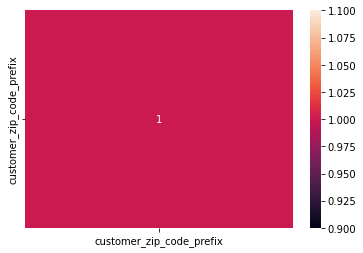

In [13]:
# create a correlation matrix rounding to one decimal point
correlation_matrix = customer_dataset.corr().round(1)
# print a correlation heat map
sns.heatmap(data=correlation_matrix, annot=True)

In [15]:
pd_reader2 =pd.read_csv(open("order_pd.csv"))

In [16]:
order_ds = pd_reader2

In [17]:
order_ds.head

<bound method NDFrame.head of        Unnamed: 0                          order_id  \
0               0  e481f51cbdc54678b7cc49136f2d6af7   
1               1  53cdb2fc8bc7dce0b6741e2150273451   
2               2  47770eb9100c2d0c44946d9cf07ec65d   
3               3  949d5b44dbf5de918fe9c16f97b45f8a   
4               4  ad21c59c0840e6cb83a9ceb5573f8159   
...           ...                               ...   
99436       99436  9c5dedf39a927c1b2549525ed64a053c   
99437       99437  63943bddc261676b46f01ca7ac2f7bd8   
99438       99438  83c1379a015df1e13d02aae0204711ab   
99439       99439  11c177c8e97725db2631073c19f07b62   
99440       99440  66dea50a8b16d9b4dee7af250b4be1a5   

                            customer_id order_purchase_timestamp  \
0      9ef432eb6251297304e76186b10a928d      2017-10-02 10:56:33   
1      b0830fb4747a6c6d20dea0b8c802d7ef      2018-07-24 20:41:37   
2      41ce2a54c0b03bf3443c3d931a367089      2018-08-08 08:38:49   
3      f88197465ea7920adcdbec7375364d

In [27]:
SELECT * FROM `customer_dataset` p JOIN `order_ds` c ON ( p.customer_id = c.id );

SyntaxError: invalid syntax (4034479259.py, line 1)

In [29]:
customers_order2 = pd.merge(customer_dataset, order_ds,how='left')
customers_order2

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Unnamed: 0,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,status__approved,status__canceled,status__created,status__delivered,status__invoiced,status__processing,status__shipped,status__unavailable,period,ship_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,88492,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,0,0,0,1,0,0,0,0,19 days 08:54:25,0.454930
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,90418,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,0,0,0,1,0,0,0,0,24 days 03:11:36,0.690412
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,22557,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,0,0,0,1,0,0,0,0,24 days 07:52:15,1.071901
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,32180,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,0,0,0,1,0,0,0,0,27 days 07:53:22,0.548817
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,69902,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,0,0,0,1,0,0,0,0,16 days 14:08:30,0.690889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1822,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,0,0,0,1,0,0,0,0,17 days 08:11:43,0.356336
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,16146,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,0,0,0,1,0,0,0,0,15 days 15:39:38,0.475357
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,70778,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,0,0,0,1,0,0,0,0,23 days 03:48:10,1.336548
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,30836,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,0,0,0,1,0,0,0,0,31 days 02:51:27,0.416191


In [30]:
customers_order2.to_csv('customer_order.csv')

In [37]:
import git

ModuleNotFoundError: No module named 'git'

In [32]:
from git import Repo

ModuleNotFoundError: No module named 'git'

In [34]:
git clone https://github.com/RongyuWu/MLDE_Group.git

SyntaxError: invalid syntax (2638593409.py, line 1)